In [1]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats  # 과학용 계산 라이브러리                                                                                                  
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

In [2]:
df = pd.read_csv("C:/Users/tansy/Ai/abalone.csv", index_col=0)
df

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
id,,,,,,,,,
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9


In [17]:
df.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight',
       'Viscera_weight', 'Shell_weight', 'Rings'],
      dtype='object')

## Sex 칼럼 문자 => 라벨 인코딩

In [4]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['Sex'] = label_encoder.fit_transform(df['Sex'])
df['Sex'].value_counts().sort_index()

Sex
0    1307
1    1342
2    1528
Name: count, dtype: int64

## 레이블 값 확인 

Text(0.5, 1.0, 'Label')

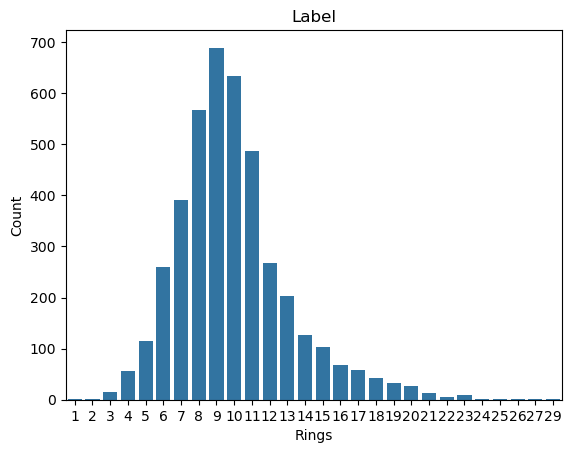

In [5]:
sns.countplot(data = df, x="Rings")
plt.xlabel("Rings")
plt.ylabel("Count")
plt.title("Label")

In [6]:
df['Rings'].value_counts().sort_index()

Rings
1       1
2       1
3      15
4      57
5     115
6     259
7     391
8     568
9     689
10    634
11    487
12    267
13    203
14    126
15    103
16     67
17     58
18     42
19     32
20     26
21     14
22      6
23      9
24      2
25      1
26      1
27      2
29      1
Name: count, dtype: int64

## 결측치 확인 및 제거 

In [7]:
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole_weight      0
Shucked_weight    0
Viscera_weight    0
Shell_weight      0
Rings             0
dtype: int64

In [8]:
# 결측치 제거
df = df.dropna()
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole_weight      0
Shucked_weight    0
Viscera_weight    0
Shell_weight      0
Rings             0
dtype: int64

## 상관관계 행렬 

<Axes: >

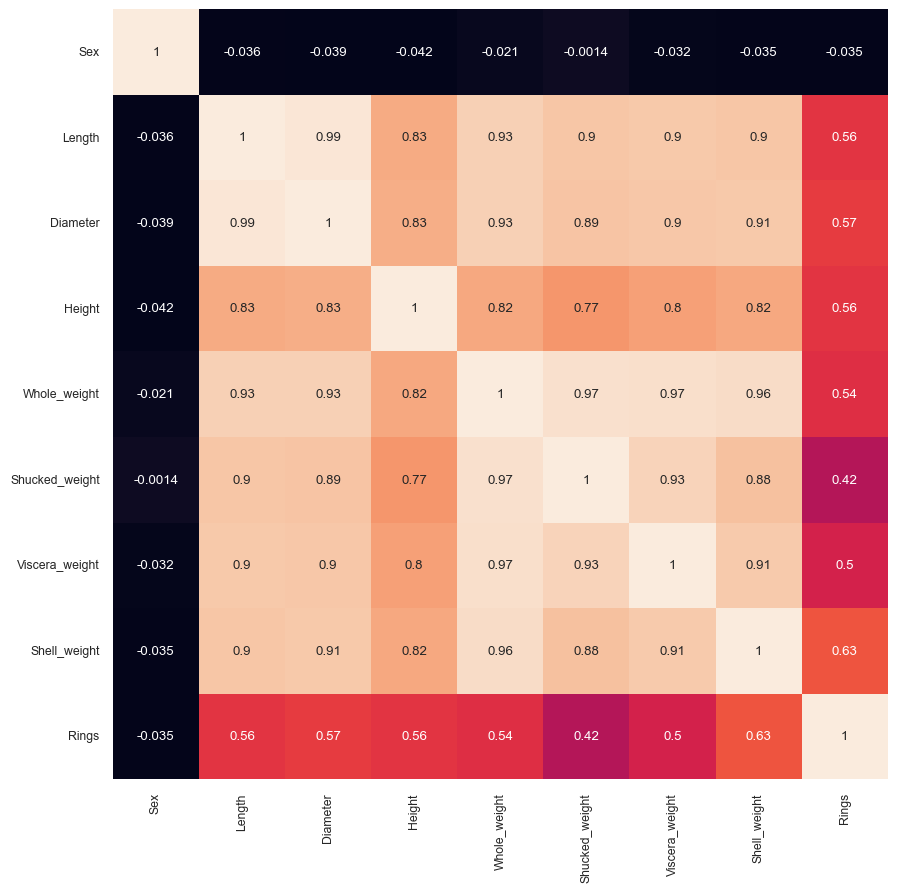

In [10]:

# 0.3 이상인 경우 상관관계가 있고, 0.7이상이면 아주 높음

df_corr = df.corr() # 상관관계 행렬 

plt.figure(figsize=(10,10))
sns.set(font_scale=0.8)
sns.heatmap(df_corr, annot=True, cbar=False) # annot는 수치 표시, cbar는 막대 표시 

# Rings와 상관관계가 높은 건  Shell_weight

## 1. 데이터 준비

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [22]:
X = df.drop(['Rings'], axis=1) # axis=1은 열이름이란 것을 알려줌 
X.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
id,,,,,,,,
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055


In [13]:
y = df.Rings
y.head()

id
0    15
1     7
2     9
3    10
4     7
Name: Rings, dtype: int64

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(X,
                                                  y,
                                                  test_size=0.2,
                                                  shuffle=True,
                                                  random_state=12)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(3341, 8) (3341,)
(836, 8) (836,)


# 2. 머신러닝 회귀 5가지

# 1. LinearRegression

## MSE 정의 및 정확도 분석 및 모델 생성 및 훈련,예측 수행

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error # MSE 제공 라이브러리 

# 모델 생성, 훈련, 예측값 산출 
model = LinearRegression() # 1. 생성 
model.fit(X_train, y_train) # 2. 훈련 
ly_preds = model.predict(X_test) # 3. 예측값 산출 

# MSE로 정확도 평가 
print('평균제곱근오차', mean_squared_error(ly_preds, y_test))

# MSE 생성 함수 
def mse_np(actual, predicted):
    return np.mean((np.array(actual) - np.array(predicted)) ** 2)

print('평균제곱근오차', mse_np(ly_preds, y_test))

def mse(actual, predicted):
    sum_square_error = sum((a - p) ** 2 for a, p in zip(actual, predicted))
    mean_square_error = sum_square_error / len(actual)
    return mean_square_error

print('평균제곱근오차', mse(ly_preds, y_test))

평균제곱근오차 4.752982651870819
평균제곱근오차 4.752982651870819
평균제곱근오차 4.752982651870814


## 산점도를 통한 예측값과 실제 값 비교(X축은 상관관계가 제일 큰 Shell_weight)

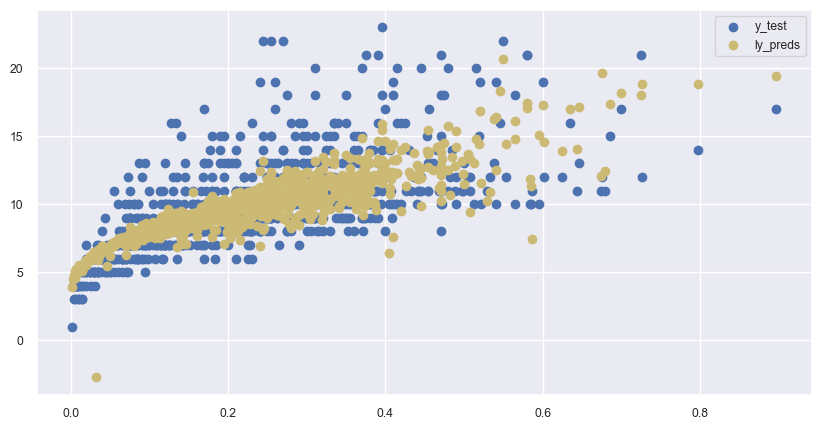

In [25]:
plt.figure(figsize=(10,5))
plt.scatter(X_test['Shell_weight'], y_test, label='y_test') # 
plt.scatter(X_test['Shell_weight'], ly_preds, c='y',label='ly_preds') # label은 범례로 뭘 뜻하는지 우상단에 쓴것 => plt.legend() 함수로 실행
plt.legend()
plt.show()

## 2. 회귀 결정 트리(DecisionTreeRegressor)

In [26]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()
model.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error

dy_preds = model.predict(X_test) # X_test로 예측값 산출 
print('평균제곱근오차', mean_squared_error(dy_preds, y_test)) # MSC로 정확도 계산(인자 : 예측값, 실제값) 

평균제곱근오차 8.142344497607656


## 산점도를 통한 예측값과 실제 값 비교(X축은 상관관계가 제일 큰 Shell_weight)

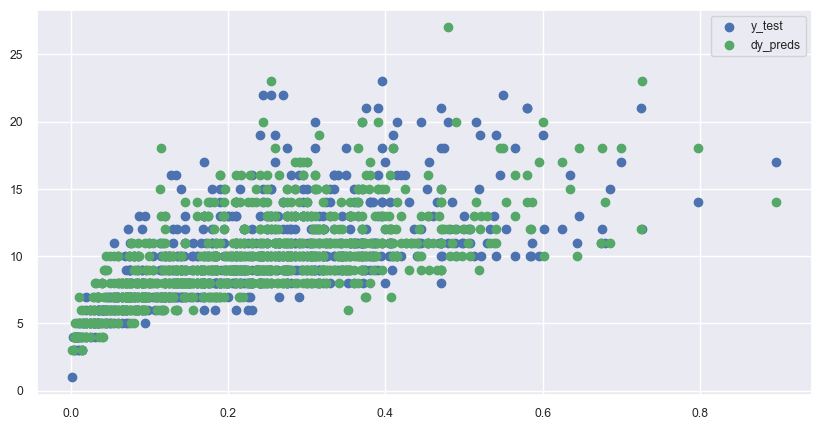

In [28]:
plt.figure(figsize=(10,5)) 
plt.scatter(X_test['Shell_weight'], y_test, label='y_test') # 실제값 분포 
plt.scatter(X_test['Shell_weight'], dy_preds, c='g' ,label='dy_preds') # 예측값 분포
plt.legend()
plt.show()

# 3. 랜덤포레스트회귀

In [29]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# 1. 모델 생성 및 훈련 
model = RandomForestRegressor()
model.fit(X_train, y_train)

# 2. 예측값 및 정확도 산출 
ry_preds = model.predict(X_test) # 예측값 
print('평균제곱근오차', mean_squared_error(ry_preds, y_test))

평균제곱근오차 4.490739832535885


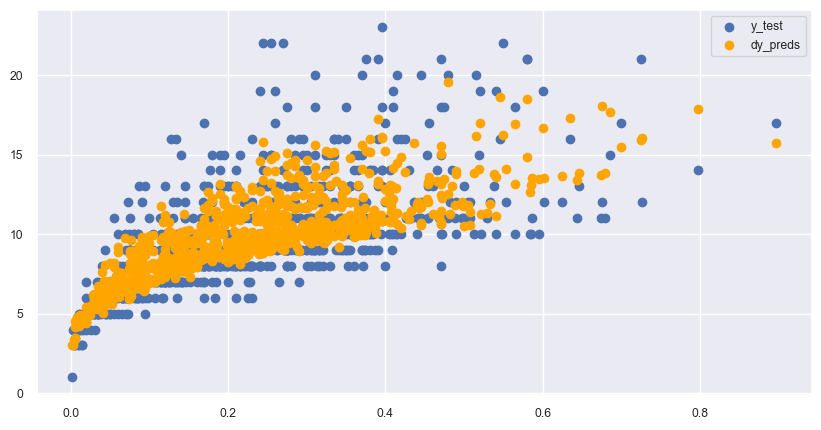

In [31]:
plt.figure(figsize=(10,5)) 
plt.scatter(X_test['Shell_weight'], y_test, label='y_test') # 실제값 분포 
plt.scatter(X_test['Shell_weight'], ry_preds, c='orange' ,label='dy_preds') # 예측값 분포
plt.legend() # 범례 표시 
plt.show()

# 4. SVR(SVM의 회귀 버전)

In [33]:
from sklearn.svm import SVR

model = SVR(kernel='linear')
model.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error

ry_preds = model.predict(X_test)
print('평균제곱근오차', mean_squared_error(ry_preds, y_test))

평균제곱근오차 5.472071562846686


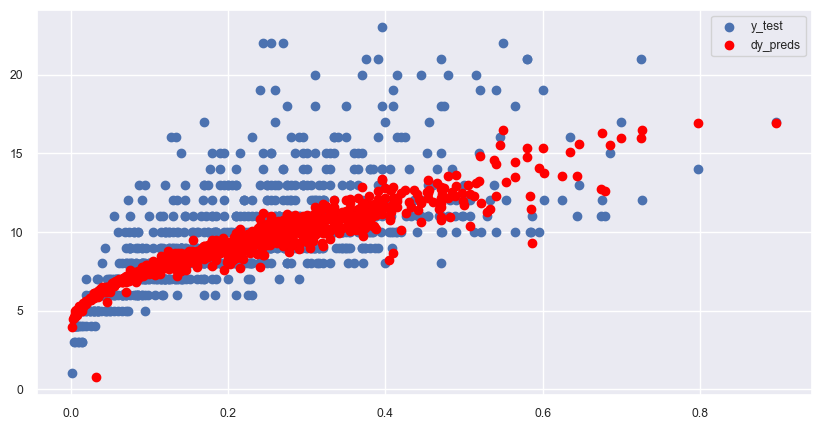

In [34]:
plt.figure(figsize=(10,5)) 
plt.scatter(X_test['Shell_weight'], y_test, label='y_test') # 실제값 분포 
plt.scatter(X_test['Shell_weight'], ry_preds, c='red' ,label='dy_preds') # 예측값 분포
plt.legend() # 범례 표시 
plt.show()

#  5. MLPRegressor <=> MLPClassifier